In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
def gradient(F,h):
  # F in 2D
  n = F.shape
  Fx = torch.zeros(n[0]-2,n[1])
  Fy = torch.zeros(n[0],n[1]-2)
  # Compute derivative wrt x
  for i in range(1,n[0]-1):
    for j in range(n[1]):
      Fx[i-1,j] = (F[i+1,j] - F[i-1,j])/(2*h)

  # Compute derivative wrt y
  for i in range(n[0]):
    for j in range(1,n[1]-1):
      Fy[i,j-1] = (F[i,j+1] - F[i,j-1])/(2*h)

  return Fx, Fy

def gradientVec(F,h):

  Fx = (F[2:,:] - F[:-2,:])/(2*h)
  Fy = (F[:,2:] - F[:,:-2])/(2*h)
  
  return Fx, Fy
  

In [ ]:
#F = torch.arange(20).reshape(4,5)*1.0
for i in range(4,10):
  n1 = 2**i
  n2 = 2**i
  F = torch.randn(n1,n2)
  #n = F.shape
  #print('F = ', F)
  h = 1.0
  t1 = time.time()
  Fx, Fy = gradient(F,h)
  t2 = time.time()
  Fxv, Fyv = gradientVec(F,h)
  t3 = time.time()
  print(torch.max(torch.abs(Fx-Fxv)),torch.max(torch.abs(Fy-Fyv)))
  print('mesh size ', 2**i,'x',2**i, 'Time of Computations = ', t2-t1,'   ', t3-t2)

tensor(0.) tensor(0.)
mesh size  16 x 16 Time of Computations =  0.01741337776184082     0.00014019012451171875
tensor(0.) tensor(0.)
mesh size  32 x 32 Time of Computations =  0.047202348709106445     9.584426879882812e-05
tensor(0.) tensor(0.)
mesh size  64 x 64 Time of Computations =  0.19738411903381348     0.0001285076141357422
tensor(0.) tensor(0.)
mesh size  128 x 128 Time of Computations =  0.7834873199462891     0.00013113021850585938
tensor(0.) tensor(0.)
mesh size  256 x 256 Time of Computations =  3.1243815422058105     0.0008225440979003906
tensor(0.) tensor(0.)
mesh size  512 x 512 Time of Computations =  12.479034185409546     0.002635955810546875


In [ ]:
12.47/0.00263

4741.444866920152

In [ ]:
def peaksFun(x,y):
    z =  3*(1-x)**2 * torch.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5)*torch.exp(-x**2-y**2) - 1/3*torch.exp(-(x+1)**2 - y**2)
    
    return z

In [ ]:
t1 = torch.arange(-3,3.0001,0.1)
t2 = torch.arange(-3,3.001,0.1)
x,y = torch.meshgrid(t1,t2)
#print(t1)
#print(x)
#print(y)

In [ ]:
z = peaksFun(x,y)

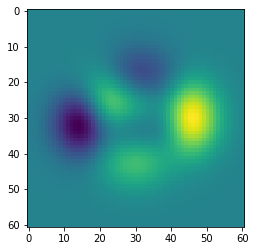

In [ ]:
plt.imshow(z)

torch.Size([61, 61])
tensor(0.1000)


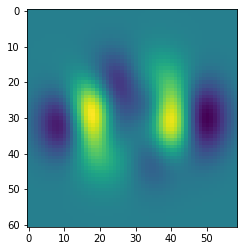

In [ ]:
print(z.shape)
print(t1[1]-t1[0])
Fx, Fy = gradientVec(z,t1[1]-t1[0])
plt.imshow(Fy)

In [ ]:
# You are given n particles at locations [x_i,y_i] i=0,..,n-1
# Goal is to compute the distance matrix between each to particles
# D_{ij} = |r_i - r_j|^2  = (x_i - x_j)^2 + (y_i - y_j)^2 
# The locations are stored in a matrix X = [x,y] x = X[:,0] and y = X[:,1]
#

def distMat(X):

  n = X.shape[0]
  print(n)
  D = torch.zeros(n,n)
  for i in range(n):
    for j in range(n):
      xi = X[i,0]
      yi = X[i,1]
      xj = X[j,0]
      yj = X[j,1]
      D[i,j] = (xi - xj)**2 + (yi - yj)**2

  return D

In [ ]:
X = torch.rand(50,2)
t1 = time.time()
D = distMat(X)
t2 = time.time()

print(t2-t1)

50
0.12022852897644043


In [ ]:
def distMatFast(X):
  # XX = X@X.t()
  # D = diag(XX) + diag(XX).t() - 2*XX
  
  XX = X@X.t()
  d  = torch.diag(XX).unsqueeze(1)
  D = d + d.t() - 2*XX

  return D

In [ ]:
X = torch.rand(5000,2)
t1 = time.time()
D = distMatFast(X)
t2 = time.time()

print(t2-t1)

0.14309287071228027
